1.  Create two (2) new tables in your own fatabse where you'll store the predictions from each model for this exercise.

In [0]:
database_name = "f1_model_db"
spark.sql(f"CREATE DATABASE IF NOT EXISTS {database_name}")
spark.sql(f"USE {database_name}")

DataFrame[]

In [0]:
# Load CSVs from S3
results = spark.read.csv("s3://columbia-gr5069-main/raw/results.csv", header=True, inferSchema=True).alias("res")
qualifying = spark.read.csv("s3://columbia-gr5069-main/raw/qualifying.csv", header=True, inferSchema=True).alias("qual")
drivers = spark.read.csv("s3://columbia-gr5069-main/raw/drivers.csv", header=True, inferSchema=True).alias("drv")
races = spark.read.csv("s3://columbia-gr5069-main/raw/races.csv", header=True, inferSchema=True).alias("rac")

# Join datasets
data = results.join(qualifying, on=["raceId", "driverId"], how="left") \
              .join(drivers, on="driverId", how="left") \
              .join(races, on="raceId", how="left")

In [0]:
%python
from pyspark.ml.feature import VectorAssembler

# Use position from qualifying to avoid ambiguity, rename it
model_df = data.selectExpr(
    "res.positionOrder",
    "res.grid",
    "qual.position as qual_position",
    "CAST(res.milliseconds AS DOUBLE) as milliseconds"
).dropna()

# Create features column
assembler = VectorAssembler(
    inputCols=["grid", "qual_position", "milliseconds"],
    outputCol="features"
)
final_data = assembler.transform(model_df).select("features", "positionOrder")

display(final_data)

features,positionOrder
"Map(vectorType -> dense, length -> 3, values -> List(1.0, 1.0, 5690616.0))",1
"Map(vectorType -> dense, length -> 3, values -> List(5.0, 5.0, 5696094.0))",2
"Map(vectorType -> dense, length -> 3, values -> List(7.0, 7.0, 5698779.0))",3
"Map(vectorType -> dense, length -> 3, values -> List(11.0, 12.0, 5707797.0))",4
"Map(vectorType -> dense, length -> 3, values -> List(3.0, 3.0, 5708630.0))",5
"Map(vectorType -> dense, length -> 3, values -> List(2.0, 2.0, 5478555.0))",1
"Map(vectorType -> dense, length -> 3, values -> List(4.0, 6.0, 5498125.0))",2
"Map(vectorType -> dense, length -> 3, values -> List(8.0, 3.0, 5517005.0))",3
"Map(vectorType -> dense, length -> 3, values -> List(3.0, 5.0, 5524387.0))",4
"Map(vectorType -> dense, length -> 3, values -> List(9.0, 4.0, 5525103.0))",5


In [0]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
import mlflow
import mlflow.spark

# Split data
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

# Define model and pipeline
rf = RandomForestRegressor(labelCol="positionOrder", featuresCol="features", numTrees=10)
pipeline = Pipeline(stages=[rf])

# Start MLflow experiment
mlflow.set_experiment("/Users/mm6642@columbia.edu/f1-model") 

with mlflow.start_run():
    model = pipeline.fit(train_data)
    mlflow.spark.log_model(model, "rf_model")
    
    predictions = model.transform(test_data)
    
    evaluator = RegressionEvaluator(labelCol="positionOrder", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)
    mlflow.log_metric("rmse", rmse)

2025/04/21 23:19:22 INFO mlflow.tracking.fluent: Experiment with name '/Users/mm6642@columbia.edu/f1-model' does not exist. Creating a new experiment.
2025/04/21 23:19:42 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/04/21 23:20:11 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/950555161299430/f192a1bc72564029bd157986f335c9a4/artifacts/rf_model/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


In [0]:
# First table: full prediction with features
predictions_table_1 = predictions.select("features", "positionOrder", "prediction")

# Second table: simplified schema
predictions_table_2 = predictions.selectExpr(
    "CAST(positionOrder AS INT) AS true_pos",
    "CAST(prediction AS DOUBLE) AS pred_pos"
)

# Save to your own database
predictions_table_1.write.mode("overwrite").saveAsTable(f"{database_name}.model_predictions_1")
predictions_table_2.write.mode("overwrite").saveAsTable(f"{database_name}.model_predictions_2")

2. [30 pts] Build two (2) predictive models using MLflow, logging hyperparameters, the model itself, four metrics, and two artifcats. Submit submit your MLflow experiments as part of your assignments

In [0]:
import mlflow
import mlflow.spark
import matplotlib.pyplot as plt
import pandas as pd
import os
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import RandomForestRegressor, LinearRegression
from pyspark.ml import Pipeline

# Create train-test split
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

# Evaluation metrics function
def evaluate_and_log_metrics(predictions, label_col="positionOrder"):
    evaluator_rmse = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="rmse")
    evaluator_mae = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="mae")
    evaluator_r2 = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="r2")
    evaluator_ev = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="var")

    mlflow.log_metric("rmse", evaluator_rmse.evaluate(predictions))
    mlflow.log_metric("mae", evaluator_mae.evaluate(predictions))
    mlflow.log_metric("r2", evaluator_r2.evaluate(predictions))
    mlflow.log_metric("explained_variance", evaluator_ev.evaluate(predictions))

2025/04/21 23:25:26 INFO mlflow.tracking.fluent: Experiment with name '/Users/mm6642@columbia.edu/f1-models' does not exist. Creating a new experiment.
2025/04/21 23:25:42 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/04/21 23:26:10 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/950555161299431/dce9c7c384e341ada405ac69da465cf1/artifacts/model/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


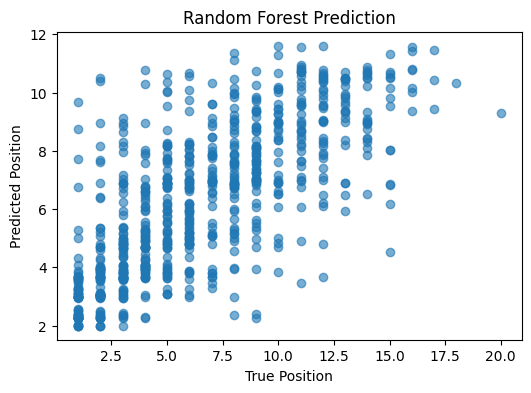

In [0]:
mlflow.set_experiment("/Users/mm6642@columbia.edu/f1-models")  # change your email

with mlflow.start_run(run_name="RandomForest_Model"):
    rf = RandomForestRegressor(labelCol="positionOrder", featuresCol="features", numTrees=20, maxDepth=5)
    pipeline = Pipeline(stages=[rf])
    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)

    # Log model and hyperparams
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_param("numTrees", 20)
    mlflow.log_param("maxDepth", 5)
    mlflow.spark.log_model(model, "model")

    # Metrics
    evaluate_and_log_metrics(predictions)

    # Artifact 1: Save predictions CSV
    pred_df = predictions.select("prediction", "positionOrder").toPandas()
    pred_csv_path = "/tmp/rf_predictions.csv"
    pred_df.to_csv(pred_csv_path, index=False)
    mlflow.log_artifact(pred_csv_path)

    # Artifact 2: Plot true vs predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(pred_df["positionOrder"], pred_df["prediction"], alpha=0.6)
    plt.xlabel("True Position")
    plt.ylabel("Predicted Position")
    plt.title("Random Forest Prediction")
    plot_path = "/tmp/rf_plot.png"
    plt.savefig(plot_path)
    mlflow.log_artifact(plot_path)

2025/04/21 23:27:38 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2025/04/21 23:28:06 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/950555161299431/34a04f4af56c4b89a3085a83b1e6fed8/artifacts/model/sparkml, flavor: spark). Fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback. 


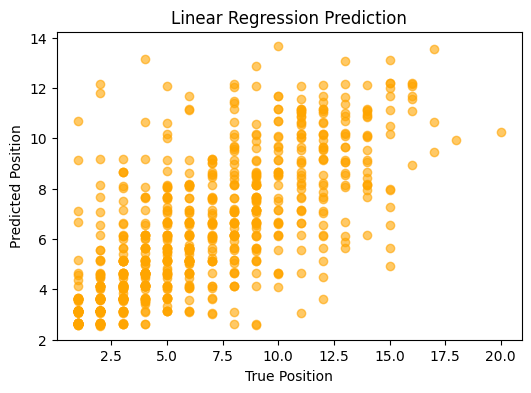

In [0]:
with mlflow.start_run(run_name="LinearRegression_Model"):
    lr = LinearRegression(labelCol="positionOrder", featuresCol="features", maxIter=50, regParam=0.1)
    pipeline = Pipeline(stages=[lr])
    model = pipeline.fit(train_data)
    predictions = model.transform(test_data)

    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("maxIter", 50)
    mlflow.log_param("regParam", 0.1)
    mlflow.spark.log_model(model, "model")

    evaluate_and_log_metrics(predictions)

    pred_df = predictions.select("prediction", "positionOrder").toPandas()
    pred_csv_path = "/tmp/lr_predictions.csv"
    pred_df.to_csv(pred_csv_path, index=False)
    mlflow.log_artifact(pred_csv_path)

    plt.figure(figsize=(6, 4))
    plt.scatter(pred_df["positionOrder"], pred_df["prediction"], alpha=0.6, color='orange')
    plt.xlabel("True Position")
    plt.ylabel("Predicted Position")
    plt.title("Linear Regression Prediction")
    plot_path = "/tmp/lr_plot.png"
    plt.savefig(plot_path)
    mlflow.log_artifact(plot_path)

3. [30 pts] For each model, store its predictions in the corresponding table you created in your own database. Ensure you are using your own database to store your predictions.

In [0]:
database_name = "f1_model_db"
spark.sql(f"USE {database_name}")

DataFrame[]

In [0]:
# Use RF model's predictions
rf_predictions_df = predictions.selectExpr(
    "CAST(positionOrder AS INT) AS true_position",
    "CAST(prediction AS DOUBLE) AS predicted_position"
)

# Save to your database table (overwrite mode)
rf_predictions_df.write.mode("overwrite").saveAsTable(f"{database_name}.rf_predictions")

In [0]:
# Use LR model's predictions
lr_predictions_df = predictions.selectExpr(
    "CAST(positionOrder AS INT) AS true_position",
    "CAST(prediction AS DOUBLE) AS predicted_position"
)

# Save to another table
lr_predictions_df.write.mode("overwrite").saveAsTable(f"{database_name}.lr_predictions")

In [0]:
spark.table("f1_model_db.rf_predictions").show()
spark.table("f1_model_db.lr_predictions").show()

+-------------+------------------+
|true_position|predicted_position|
+-------------+------------------+
|           10| 6.129850396377456|
|           13| 8.532376607237012|
|           18|  9.94834305999243|
|            5| 10.00682793270037|
|            1| 2.667332599140452|
|            1| 2.662187292541109|
|            1|2.6575568199874198|
|            1| 2.654568086614077|
|            1|2.6503328987711083|
|            1|2.6502808623596614|
|            3|  2.64954159968781|
|            2|2.6481742901725576|
|            2|2.6479286245459686|
|            2|2.6472899784040003|
|            1|2.6465825520311075|
|            1| 2.645974436477405|
|            2| 2.643463209185195|
|            1| 2.638943030781821|
|            3|2.6374208793396643|
|            2|2.6369345789129808|
+-------------+------------------+
only showing top 20 rows

+-------------+------------------+
|true_position|predicted_position|
+-------------+------------------+
|           10| 6.12985039637